In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Define meaningful labels for the datasets
PCAPDROID_LABELS = {
    0:'TikTok',1: 'Youtube',2: 'Amazon',3: 'Instagram',4:
    'Sportify',5: 'WhatsApp',6: 'Flipkart',7:
    'Sound Cloud Music',8: 'Elden Ring', 9:'Telegram'
}
ISCX_LABELS = {0:'Chat', 1:'Email',2: 'File Transfer',3: 'Streaming',4: 'VoIP'}


In [ ]:
# Load ISCX dataset (labeled)
iscx_file = "ISCX_5class_each_normalized_cuttedfloefeature.csv"  # Replace with your filename
iscx_data = pd.read_csv(iscx_file)

# Load Pcapdroid dataset (unlabeled)
pcapdroid_file = "pcapdroid_10class_each_normalized_cuttedfloefeature.csv"  # Replace with your filename
pcapdroid_data = pd.read_csv(pcapdroid_file)

print("ISCX Dataset Shape:", iscx_data.shape)
print("Pcapdroid Dataset Shape:", pcapdroid_data.shape)

ISCX Dataset Shape: (100000, 67)
Pcapdroid Dataset Shape: (180000, 67)


In [ ]:
iscx_data.head()

,label,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0.352941,0.000694,0.002068,0.000184,0.000051,0.028580,0.053910,0.050995,0.000000,...,0.002086,0,0.000489,0.000008,0.000492,0.000487,0.444513,0.000035,0.444527,0.444499
1,0,0.352941,0.000694,0.001929,0.000237,0.000066,0.036807,0.069429,0.065675,0.000000,...,0.002086,0,0.000503,0.000008,0.000506,0.000500,0.465009,0.000005,0.465011,0.465007
2,0,0.352941,0.000694,0.002151,0.000326,0.000091,0.050685,0.095607,0.090437,0.000000,...,0.002086,0,0.000534,0.000007,0.000536,0.000531,0.432067,0.166036,0.499569,0.364566
3,0,0.352941,0.022567,0.039318,0.039066,0.015104,0.689494,0.000000,0.261592,0.462599,...,0.048838,0,0.011745,0.036071,0.043437,0.001408,0.156470,0.174647,0.303488,0.059005
4,0,0.352941,0.004185,0.011055,0.001784,0.002152,0.189117,0.000000,0.082090,0.116242,...,0.007519,0,0.015958,0.028481,0.036435,0.005610,0.162346,0.185729,0.324083,0.068399


In [ ]:
pcapdroid_data.head()

,label,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0.0,0.001280,0.000330,0.001304,3.922203e-05,0.051406,0.0,0.020415,0.029016,...,0.003906,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.001280,0.000660,0.010914,5.170691e-05,0.451406,0.0,0.170884,0.255104,...,0.005208,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.000213,0.000082,0.000000,3.512082e-07,0.000000,0.0,0.000000,0.000000,...,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.001280,0.000660,0.011136,5.185419e-05,0.461847,0.0,0.174364,0.261097,...,0.005208,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.001280,0.000577,0.003584,5.687307e-06,0.111345,0.0,0.056124,0.064318,...,0.005208,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check unique labels in the ISCX dataset
unique_labels = iscx_data['label'].unique()
print("Unique Labels in ISCX Dataset:", unique_labels)


Unique Labels in ISCX Dataset: [0 1 2 3 4]


In [ ]:
# Define the label mapping for ISCX
ISCX_LABELS = {0: 'Chat', 1: 'Email', 2: 'File Transfer', 3: 'Streaming', 4: 'VoIP'}

# Map the numerical labels to their meaningful names
iscx_data['label'] = iscx_data['label'].map(ISCX_LABELS)

# Check for unmapped labels
unmapped_labels = iscx_data['label'].isna().sum()
if unmapped_labels > 0:
    print(f"Unmapped Labels Found: {unmapped_labels}")
else:
    print("All labels mapped successfully!")


All labels mapped successfully!


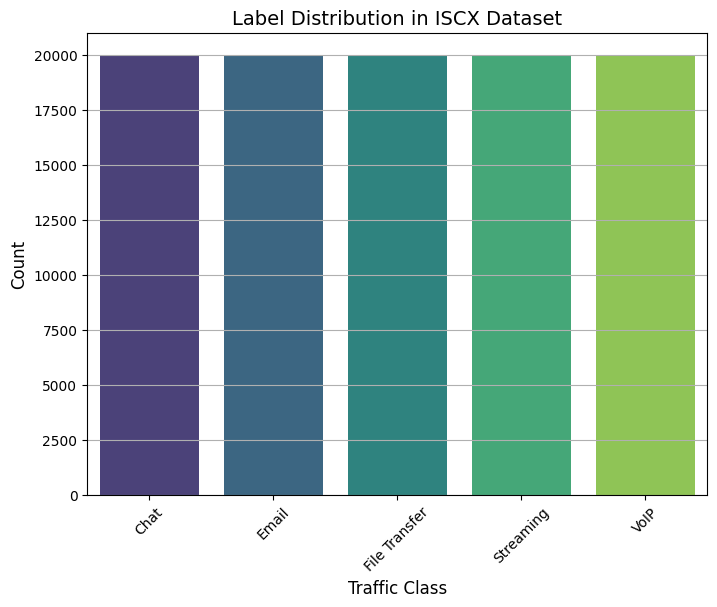

In [ ]:
# Plot the label distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=iscx_data, x='label', order=iscx_data['label'].value_counts().index, palette='viridis')
plt.title("Label Distribution in ISCX Dataset", fontsize=14)
plt.xlabel("Traffic Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features (all columns except the label)
iscx_features = iscx_data.iloc[:, 1:]  # All columns except the first (label)
iscx_labels = iscx_data['label']  # The label column

# Normalize the features
scaler = StandardScaler()
iscx_features_scaled = scaler.fit_transform(iscx_features)

# Convert back to DataFrame
iscx_features_scaled = pd.DataFrame(iscx_features_scaled, columns=iscx_features.columns)

print("Features normalized successfully!")


Features normalized successfully!


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
iscx_train_features, iscx_test_features, iscx_train_labels, iscx_test_labels = train_test_split(
    iscx_features_scaled, iscx_labels, test_size=0.1, random_state=42, stratify=iscx_labels
)

print(f"Training set size: {iscx_train_features.shape[0]}")
print(f"Testing set size: {iscx_test_features.shape[0]}")


Training set size: 90000
Testing set size: 10000


In [ ]:
# Save training and testing sets
iscx_train_features.to_csv("iscx_train_features.csv", index=False)
iscx_test_features.to_csv("iscx_test_features.csv", index=False)
pd.DataFrame(iscx_train_labels).to_csv("iscx_train_labels.csv", index=False)
pd.DataFrame(iscx_test_labels).to_csv("iscx_test_labels.csv", index=False)

print("Preprocessed data saved!")


Preprocessed data saved!


**Next**

In [ ]:
# Check unique labels in the ISCX dataset
unique_labels_P = pcapdroid_data['label'].unique()

print("Unique Labels in Pcapdroid Dataset:", unique_labels_P)

Unique Labels in Pcapdroid Dataset: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Map Pcapdroid labels
if 'label' in pcapdroid_data.columns:  # Check if label column exists
    pcapdroid_data['label'] = pcapdroid_data['label'].map(PCAPDROID_LABELS)

    # Check for unmapped labels
    print("Mapped Pcapdroid Labels Distribution:")
    print(pcapdroid_data['label'].value_counts())
else:
    print("Pcapdroid dataset has no label column. Proceeding with pseudo-labeling.")


Mapped Pcapdroid Labels Distribution:
label
TikTok               18000
Youtube              18000
Amazon               18000
Instagram            18000
Sportify             18000
WhatsApp             18000
Flipkart             18000
Sound Cloud Music    18000
Elden Ring           18000
Telegram             18000
Name: count, dtype: int64


In [ ]:
# Normalize Pcapdroid features
pcapdroid_features = pcapdroid_data.iloc[:, 1:]  # Exclude the label column
pcapdroid_features_scaled = scaler.transform(pcapdroid_features)
pcapdroid_features_scaled = pd.DataFrame(pcapdroid_features_scaled, columns=pcapdroid_features.columns)

In [ ]:
from sklearn.utils import shuffle

# Shuffle Pcapdroid dataset
pcapdroid_features_scaled = shuffle(pcapdroid_features_scaled, random_state=42)

# Split into labeled (10%) and unlabeled (90%)
labeled_fraction = 0.1
labeled_pcapdroid = pcapdroid_features_scaled[:int(len(pcapdroid_features_scaled) * labeled_fraction)]
unlabeled_pcapdroid = pcapdroid_features_scaled[int(len(pcapdroid_features_scaled) * labeled_fraction):]

print(f"Labeled Pcapdroid set size: {labeled_pcapdroid.shape[0]}")
print(f"Unlabeled Pcapdroid set size: {unlabeled_pcapdroid.shape[0]}")


Labeled Pcapdroid set size: 18000
Unlabeled Pcapdroid set size: 162000


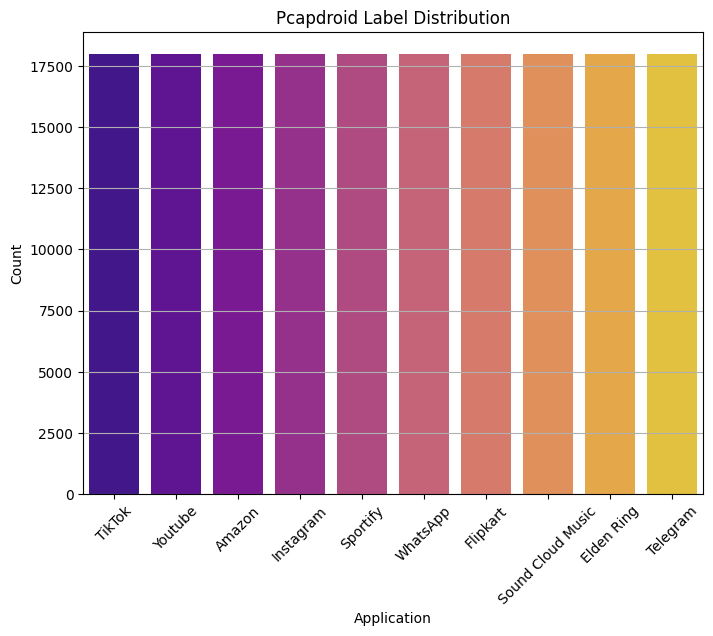

In [ ]:

# Plot Pcapdroid label distribution (if labels exist)
if 'label' in pcapdroid_data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=pcapdroid_data, x='label', order=pcapdroid_data['label'].value_counts().index, palette='plasma')
    plt.title("Pcapdroid Label Distribution")
    plt.xlabel("Application")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


In [ ]:
# Save Pcapdroid data
labeled_pcapdroid.to_csv("labeled_pcapdroid.csv", index=False)
unlabeled_pcapdroid.to_csv("unlabeled_pcapdroid.csv", index=False)

print("Preprocessed data saved!")

Preprocessed data saved!


**Next**

In [ ]:
# Display the first few rows of ISCX training features
print("ISCX Training Features (first 5 rows):")
print(iscx_train_features.head())

# Display the first few rows of ISCX training labels
print("\nISCX Training Labels (first 5 rows):")
print(iscx_train_labels.head())


ISCX Training Features (first 5 rows):
       Protocol  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
98271   0.48774     -0.087250     -0.092224        -0.104215        -0.061103   
16830   0.48774     -0.083306     -0.092224        -0.103034        -0.061326   
94026   0.48774     -0.087250     -0.092224        -0.104215        -0.061103   
95629   0.48774     -0.087250     -0.092224        -0.104215        -0.061103   
71415   0.48774     -0.090586     -0.092110        -0.104802        -0.062491   

       Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
98271        -0.201572         0.122315         -0.003771        -0.169615   
16830        -0.084646        -0.219551         -0.059780        -0.169615   
94026        -0.201572         0.122315         -0.003771        -0.169615   
95629        -0.201572         0.122315         -0.003771        -0.169615   
71415        -0.257051        -0.655933         -0.510234        -0.169615   

     

In [ ]:
# Display the first few rows of ISCX testing features
print("\nISCX Testing Features (first 5 rows):")
print(iscx_test_features.head())

# Display the first few rows of ISCX testing labels
print("\nISCX Testing Labels (first 5 rows):")
print(iscx_test_labels.head())



ISCX Testing Features (first 5 rows):
       Protocol  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
30768   0.48774     -0.086735      0.024826        -0.084393        -0.003379   
97398   0.48774     -0.087250     -0.092224        -0.104215        -0.061103   
45534   0.48774     -0.090498     -0.092224        -0.104800        -0.062536   
88961   0.48774     -0.087250     -0.092224        -0.104215        -0.061103   
69179   0.48774     -0.090586     -0.092110        -0.104802        -0.062503   

       Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
30768        -0.033719         0.329675         -0.021786        -0.169615   
97398        -0.201572         0.122315         -0.003771        -0.169615   
45534        -0.253133        -0.314071         -0.489318        -0.169615   
88961        -0.201572         0.122315         -0.003771        -0.169615   
69179        -0.257051        -0.655933         -0.510234        -0.169615   

     

In [ ]:
# Display the first few rows of labeled Pcapdroid dataset
print("Labeled Pcapdroid Dataset (first 5 rows):")
print(labeled_pcapdroid.head())


Labeled Pcapdroid Dataset (first 5 rows):
        Protocol  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
123137  0.487740     -0.085353     -0.089910        -0.102285   
130504 -1.869167     -0.067313     -0.078769        -0.075290   
31166  -1.869167     -0.066171     -0.092224        -0.104802   
26262  -1.869167      0.055900     -0.020727        -0.068388   
64868  -3.154752     -0.076884     -0.076837        -0.008496   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
123137        -0.062063        -0.211102        -0.521201         -0.431927   
130504        -0.060632         0.629776        -0.655933         -0.002719   
31166         -0.062537        -0.257051        -0.655933         -0.510234   
26262         -0.060618         0.331103        -0.655933         -0.089231   
64868         -0.061026         0.178883        -0.655933          0.351528   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  \
123137        -0.169615 

In [ ]:
# Display the first few rows of unlabeled Pcapdroid dataset
print("\nUnlabeled Pcapdroid Dataset (first 5 rows):")
print(unlabeled_pcapdroid.head())



Unlabeled Pcapdroid Dataset (first 5 rows):
        Protocol  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
170846 -1.869167     -0.090586     -0.088683        -0.104802   
126655 -1.869167     -0.087261     -0.092224        -0.104802   
108419 -1.869167     -0.043493     -0.071397        -0.026207   
141817  0.487740     -0.090586     -0.090302        -0.104802   
116275 -1.869167     -0.085353     -0.092224        -0.104802   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
170846        -0.062537        -0.257051        -0.655933         -0.510234   
126655        -0.062537        -0.257051        -0.655933         -0.510234   
108419        -0.054645         0.738906        -0.655933         -0.238551   
141817        -0.062427        -0.257051        -0.655933         -0.510234   
116275        -0.062537        -0.257051        -0.655933         -0.510234   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  \
170846        -0.1696

In [ ]:
# Print ISCX dataset statistics
print("\nISCX Dataset Statistics:")
print(f"Training Set: {iscx_train_features.shape[0]} samples")
print(f"Testing Set: {iscx_test_features.shape[0]} samples")



ISCX Dataset Statistics:
Training Set: 90000 samples
Testing Set: 10000 samples


In [ ]:
# Print Pcapdroid dataset statistics
print("\nPcapdroid Dataset Statistics:")
print(f"Labeled Set: {labeled_pcapdroid.shape[0]} samples")
print(f"Unlabeled Set: {unlabeled_pcapdroid.shape[0]} samples")



Pcapdroid Dataset Statistics:
Labeled Set: 18000 samples
Unlabeled Set: 162000 samples


In [ ]:
# Display all rows and columns of a dataset (e.g., ISCX training features)
print(iscx_train_features)


       Protocol  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
98271  0.487740     -0.087250     -0.092224        -0.104215        -0.061103   
16830  0.487740     -0.083306     -0.092224        -0.103034        -0.061326   
94026  0.487740     -0.087250     -0.092224        -0.104215        -0.061103   
95629  0.487740     -0.087250     -0.092224        -0.104215        -0.061103   
71415  0.487740     -0.090586     -0.092110        -0.104802        -0.062491   
...         ...           ...           ...              ...              ...   
63638 -3.154752     -0.090171     -0.091996        -0.104802        -0.062537   
24246  0.487740     -0.085472     -0.092224        -0.088687        -0.057626   
82534  0.487740     -0.083915     -0.092224        -0.102133        -0.059277   
40668  0.487740     -0.090586     -0.092168        -0.104802        -0.062511   
98352  0.487740     -0.087250     -0.092224        -0.104215        -0.061103   

       Fwd Pkt Len Max  Fwd

**NEXT**

n_classes 10
x_train (162000, 66)
y_train (162000,)
Selected labeled data indices: 40000
x_train_labeled shape: (40000, 66)
y_train_labeled shape: (40000, 10)
Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.1537 - loss: 2.2046 - val_accuracy: 0.0000e+00 - val_loss: 5.7052
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.5359 - loss: 1.4048 - val_accuracy: 0.0000e+00 - val_loss: 6.4916
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 28s 99ms/step - accuracy: 0.7251 - loss: 0.8710 - val_accuracy: 0.0000e+00 - val_loss: 6.8806
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.7947 - loss: 0.6384 - val_accuracy: 0.0000e+00 - val_loss: 6.6336
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - accuracy: 0.8326 - loss: 0.5218 - val_accuracy: 0.0000e+00 - val_loss: 6.8780
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.8535 - loss: 0.4523 - val_accuracy: 0.0000e+00 - val_loss: 7.9788
Epoch 7/10
282/282 ━━━━━━━━━━━━━━

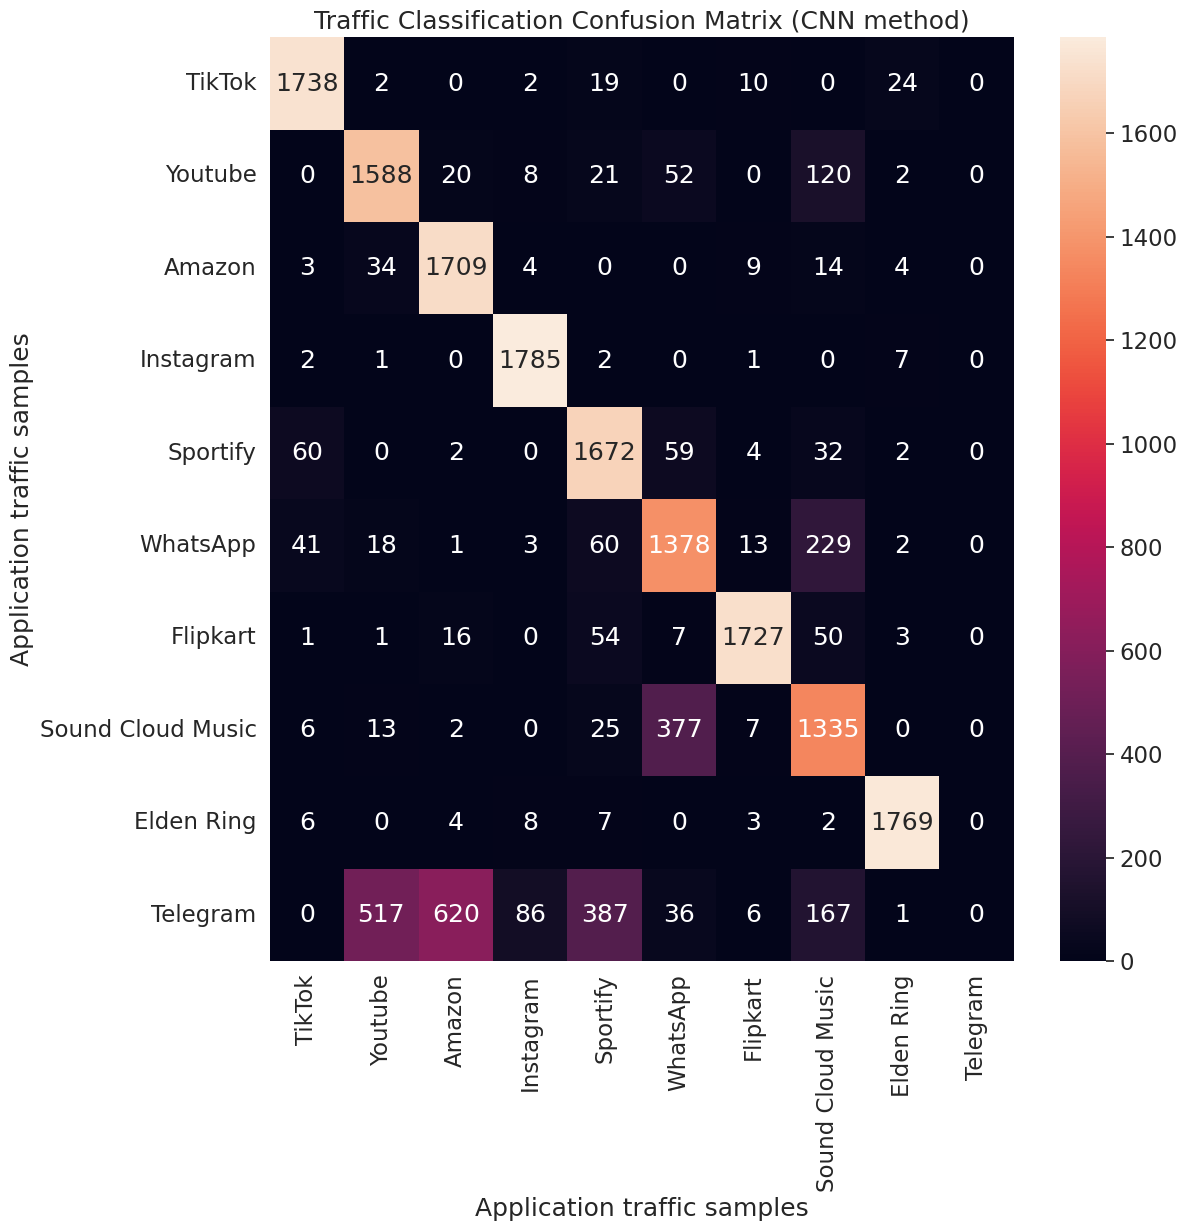

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
labelnum = 4000  # Set the quantity of labeled data
LABELS = [
    'TikTok', 'Youtube', 'Amazon', 'Instagram',
    'Sportify', 'WhatsApp', 'Flipkart',
    'Sound Cloud Music', 'Elden Ring', 'Telegram'
]

# Step 1: Load Preprocessed Dataset (normalized and feature-engineered)
dfDS = pd.read_csv('pcapdroid_10class_each_normalized_cuttedfloefeature.csv')
X_full = dfDS.iloc[:, 1:len(dfDS.columns)].values
Y_full = dfDS["label"].values
n_classes = len(set(Y_full))
print("n_classes", n_classes)

# Step 2: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X_full, Y_full, test_size=0.1)
inp_size = x_train.shape[1]  # Feature size
print("x_train", x_train.shape)
print("y_train", y_train.shape)

# Step 3: Get Labeled Data Indices
def getlabelindex(Y_full, n_classes, labelnum):
    Y_full = pd.DataFrame(Y_full)
    Y_full.columns = ['label']
    idxs_annot = []
    for idx in range(n_classes):
        labelindex = Y_full.loc[Y_full['label'] == idx].index
        if len(labelindex) < labelnum:
            print(f"Label {idx} has fewer than {labelnum} samples, selecting all available samples.")
            idxs = np.random.choice(labelindex.values, labelnum, replace=False)
        else:
            idxs = np.random.choice(labelindex.values, labelnum, replace=False)
        idxs_annot.extend(idxs)
    return idxs_annot

# Select the labeled data
idxs_annot = getlabelindex(y_train, n_classes, labelnum)
print("Selected labeled data indices:", len(idxs_annot))

# One-hot encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

# Step 4: Prepare Labeled and Unlabeled Data
x_train_labeled = x_train[idxs_annot]
y_train_labeled = y_train[idxs_annot]
x_train_unlabeled = x_train
print("x_train_labeled shape:", x_train_labeled.shape)
print("y_train_labeled shape:", y_train_labeled.shape)

# Reshaping data for CNN input
x_train_labeled = np.expand_dims(x_train_labeled, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Step 5: Build CNN Model
model = Sequential()
model.add(Conv1D(64, 3, padding="same", activation="relu", input_shape=(inp_size, 1)))
model.add(Conv1D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding="same", activation="relu"))
model.add(Conv1D(128, 3, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation="softmax"))

# Compile model
rmsprop = optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])


# Step 6: Train the Model with Labeled Data
history = model.fit(x_train_labeled, y_train_labeled, epochs=10, batch_size=128, validation_split=0.1)

# Step 7: Evaluate on Test Data
scores = model.evaluate(x_test, y_test, verbose=1)
y_pred = model.predict(x_test, batch_size=100)

# Step 8: Classification Report
report = classification_report(y_test.argmax(-1), y_pred.argmax(-1), target_names=LABELS, digits=4)
print(report)

# Step 9: Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test.argmax(-1), y_pred.argmax(-1))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Traffic Classification Confusion Matrix (CNN method)")
plt.ylabel('Application traffic samples')
plt.xlabel('Application traffic samples')
plt.show()

# Print CNN Accuracy
print("CNN Accuracy: ", scores[1])


In [ ]:
# Save the model in .keras format
model.save('cnn_model.keras')  # Save the model as a .keras file
print("Model saved successfully!")


Model saved successfully!


**Next**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
import random

# Number of clients for federated learning
num_clients = 10
epochs = 5
batch_size = 128
labelnum = 4000  # Number of labeled data per client

# Define the CNN model
def create_deep_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Load dataset
df = pd.read_csv('pcapdroid_10class_each_normalized_cuttedfloefeature.csv')
X_full = df.iloc[:, 1:].values
Y_full = df['label'].values
num_classes = len(set(Y_full))

# One-hot encode labels
Y_full = tf.keras.utils.to_categorical(Y_full, num_classes)

# Split dataset into training data for the server and clients
x_server, x_clients, y_server, y_clients = train_test_split(X_full, Y_full, test_size=0.9, random_state=42)
x_server = np.expand_dims(x_server, axis=2)  # Reshape for CNN input

# Split data further into smaller chunks for each client
client_data_size = len(x_clients) // num_clients
x_clients_list = [x_clients[i*client_data_size:(i+1)*client_data_size] for i in range(num_clients)]
y_clients_list = [y_clients[i*client_data_size:(i+1)*client_data_size] for i in range(num_clients)]

# Initialize a global model
input_shape = (x_server.shape[1], 1)
global_model = create_deep_model(input_shape, num_classes)

# Function to train models on clients and aggregate updates
def train_on_clients_and_aggregate():
    # Initialize client models
    client_models = [tf.keras.models.clone_model(global_model) for _ in range(num_clients)]

    # Train each client model locally
    for client_id in range(num_clients):
        client_model = client_models[client_id]
        client_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        client_model.fit(np.expand_dims(x_clients_list[client_id], axis=2), y_clients_list[client_id], epochs=epochs, batch_size=batch_size, verbose=1)

    # Aggregate model weights from all clients
    client_weights = [client_model.get_weights() for client_model in client_models]
    aggregated_weights = np.mean(client_weights, axis=0)

    # Update the global model with aggregated weights
    global_model.set_weights(aggregated_weights)

# Federated learning loop
for iteration in range(10):  # Global federated training epochs
    print(f"Global iteration {iteration + 1} of federated learning")
    train_on_clients_and_aggregate()  # Clients train and aggregate

    # Evaluate the global model on server data
    y_pred = global_model.predict(np.expand_dims(x_server, axis=2), batch_size=100)
    acc = accuracy_score(y_server.argmax(-1), y_pred.argmax(-1))
    print(f"Global model accuracy after iteration {iteration + 1}: {acc:.4f}")

    # Classification report
    report = classification_report(y_server.argmax(-1), y_pred.argmax(-1), target_names=LABELS)
    print(report)


Global iteration 1 of federated learning
Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3684 - loss: 1.8241
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7637 - loss: 0.7546
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.8379 - loss: 0.5070
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8619 - loss: 0.4229
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8778 - loss: 0.3756
Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.3678 - loss: 1.8459
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7566 - loss: 0.7854
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8301 - loss: 0.5232
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.8521 - loss: 0.4363
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8621 - loss: 0.4055
Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.4109 - loss: 1.7885
Epoch 2/5
12

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10, 8) + inhomogeneous part.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the global model architecture
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=10),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a global model (this will be shared by all clients)
global_model = create_model()

# Simulate multiple clients (assuming each client has some dataset)
num_clients = 10
clients_model = [create_model() for _ in range(num_clients)]  # Each client has a model

# Function to train clients on their respective data
def train_on_clients():
    for client_id in range(num_clients):
        # Assuming each client has some data (X_train_client, y_train_client)
        X_train_client = np.random.rand(100, 10)  # Example: 100 samples, 10 features
        y_train_client = np.random.randint(2, size=100)  # Example: Binary labels

        # Train the model for 1 epoch (you can modify epochs or batch size)
        clients_model[client_id].fit(X_train_client, y_train_client, epochs=1, batch_size=32)

# Function to aggregate weights from all client models
def aggregate_weights():
    # Initialize an empty list to hold the aggregated weights
    aggregated_weights = []

    # Check that all client models have the same shape
    for client_id in range(num_clients):
        client_weights = clients_model[client_id].get_weights()
        if len(client_weights) != len(global_model.get_weights()):
            print(f"Model weights mismatch for client {client_id}. Exiting...")
            return

        if client_id == 0:
            # Initialize aggregated weights with the first client's model
            aggregated_weights = [np.zeros_like(w) for w in client_weights]

        # Accumulate the weights from each client model
        for i in range(len(client_weights)):
            aggregated_weights[i] += client_weights[i]

    # Average the accumulated weights
    for i in range(len(aggregated_weights)):
        aggregated_weights[i] /= num_clients

    # Set the global model weights to the averaged ones
    global_model.set_weights(aggregated_weights)

# Function to train on clients and aggregate
def train_on_clients_and_aggregate():
    print("Training on clients...")
    train_on_clients()  # Train models on clients
    print("Aggregating weights...")
    aggregate_weights()  # Aggregate the weights from all clients

# Federated training loop
for iteration in range(10):  # Global federated training epochs
    print(f"Global iteration {iteration + 1} of federated learning")
    train_on_clients_and_aggregate()  # Clients train and aggregate

    # Evaluate the global model on some validation data
    X_val = np.random.rand(100, 10)  # Example validation data
    y_val = np.random.randint(2, size=100)  # Example validation labels
    loss, accuracy = global_model.evaluate(X_val, y_val)
    print(f"Global model - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Global iteration 1 of federated learning
Training on clients...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5726 - loss: 0.6837  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5295 - loss: 0.7012  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5973 - loss: 0.6922  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4960 - loss: 0.7006  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5222 - loss: 0.7037  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3867 - loss: 0.7054  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5528 - loss: 0.6981  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4920 - loss: 0.7075  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3695 - loss: 0.7602  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4847 - loss: 0.7006  
Aggregating weights...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4752 - loss: 0.6932  
Global model - Loss: 0.6931, Accuracy: 0.4900
Global iteration 2 of federated learning
Training on clients...


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
import random

# Number of clients for federated learning
num_clients = 10
epochs = 1
batch_size = 128
labelnum = 4000  # Number of labeled data per client

# Define the CNN model
def create_deep_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Load dataset
df = pd.read_csv('pcapdroid_10class_each_normalized_cuttedfloefeature.csv')
X_full = df.iloc[:, 1:].values
Y_full = df['label'].values
num_classes = len(set(Y_full))

# One-hot encode labels
Y_full = tf.keras.utils.to_categorical(Y_full, num_classes)

# Split dataset into training data for the server and clients
x_server, x_clients, y_server, y_clients = train_test_split(X_full, Y_full, test_size=0.9, random_state=42)
x_server = np.expand_dims(x_server, axis=2)  # Reshape for CNN input

# Split data further into smaller chunks for each client
client_data_size = len(x_clients) // num_clients
x_clients_list = [x_clients[i*client_data_size:(i+1)*client_data_size] for i in range(num_clients)]
y_clients_list = [y_clients[i*client_data_size:(i+1)*client_data_size] for i in range(num_clients)]

# Initialize a global model
input_shape = (x_server.shape[1], 1)
global_model = create_deep_model(input_shape, num_classes)

# Function to train models on clients and aggregate updates
def train_on_clients_and_aggregate():
    # Initialize client models
    client_models = [tf.keras.models.clone_model(global_model) for _ in range(num_clients)]

    # Train each client model locally
    for client_id in range(num_clients):
        client_model = client_models[client_id]
        client_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        client_model.fit(np.expand_dims(x_clients_list[client_id], axis=2), y_clients_list[client_id], epochs=epochs, batch_size=batch_size, verbose=1)

    # Aggregate model weights from all clients
    client_weights = [client_model.get_weights() for client_model in client_models]

    # Check if all client model weights have the same shape
    weights_shapes = [[w.shape for w in weights] for weights in client_weights]
    print(f"Shapes of client model weights: {weights_shapes}")

    # Ensure all client models have consistent weight shapes
    if len(set(map(tuple, [tuple(shape) for shape in weights_shapes]))) > 1:
        print("Error: Client models have different weights shapes!")
        return

    # Initialize aggregated weights list
    aggregated_weights = []

    # Aggregate weights layer by layer
    for layer_idx in range(len(client_weights[0])):  # Iterate over all layers
        layer_weights = [client_weights[client_idx][layer_idx] for client_idx in range(num_clients)]
        aggregated_weights.append(np.mean(layer_weights, axis=0))

    # Update the global model with aggregated weights
    global_model.set_weights(aggregated_weights)

# Federated learning loop
for iteration in range(10):  # Global federated training epochs
    print(f"Global iteration {iteration + 1} of federated learning")
    train_on_clients_and_aggregate()  # Clients train and aggregate

    # Evaluate the global model on server data
    y_pred = global_model.predict(np.expand_dims(x_server, axis=2), batch_size=100)
    acc = accuracy_score(y_server.argmax(-1), y_pred.argmax(-1))
    print(f"Global model accuracy after iteration {iteration + 1}: {acc:.4f}")

    # Classification report
    report = classification_report(y_server.argmax(-1), y_pred.argmax(-1))
    print(report)


Global iteration 1 of federated learning
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3745 - loss: 1.8138
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.3666 - loss: 1.8299
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3795 - loss: 1.8133
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3709 - loss: 1.8236
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.3535 - loss: 1.8557
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.3577 - loss: 1.8401
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3716 - loss: 1.8248
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.3697 - loss: 1.8134
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.3604 - loss: 1.8423
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3766 - loss: 1.7946
Shapes of client model weights: [[(3, 1, 64), (64,), (3, 64, 128), (128,), (1920, 128), (128,), (128, 10), (10,)], [(3, 1, 64), (64,), (3, 64, 128), (128,), (1920, 128), (128,), (128, 10), (10,)], [(

In [ ]:
# Save the trained global model to a .keras file after federated learning is done
global_model.save('federated_model.keras')
print("Model saved as 'federated_model.keras'")

Model saved as 'federated_model.keras'


n_classes 10
x_train (162000, 66)
y_train (162000,)
Selected labeled data indices: 40000
x_train_labeled shape: (40000, 66)
y_train_labeled shape: (40000, 10)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/10 [D loss: 0.6831893920898438 | D accuracy: 71.09375] [G loss: [array(0.69420666, dtype=float32), array(0.69420666, dtype=float32), array(0.484375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


2/10 [D loss: 0.6844936013221741 | D accuracy: 57.421875] [G loss: [array(0.6957799, dtype=float32), array(0.6957799, dtype=float32), array(0.4921875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3/10 [D loss: 0.6888679265975952 | D accuracy: 54.42708134651184] [G loss: [array(0.6996929, dtype=float32), array(0.6996929, dtype=float32), array(0.49479166, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/10 [D loss: 0.6947400569915771 | D accuracy: 53.15290093421936] [G loss: [array(0.70619905, dtype=float32), array(0.70619905, dtype=float32), array(0.49609375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5/10 [D loss: 0.7024362087249756 | D accuracy: 52.44791507720947] [G loss: [array(0.71377885, dtype=float32), array(0.71377885, dtype=float32), array(0.496875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/10 [D loss: 0.709953784942627 | D accuracy: 52.00047492980957] [G loss: [array(0.7220664, dtype=float32), array(0.7220664, dtype=float32), array(

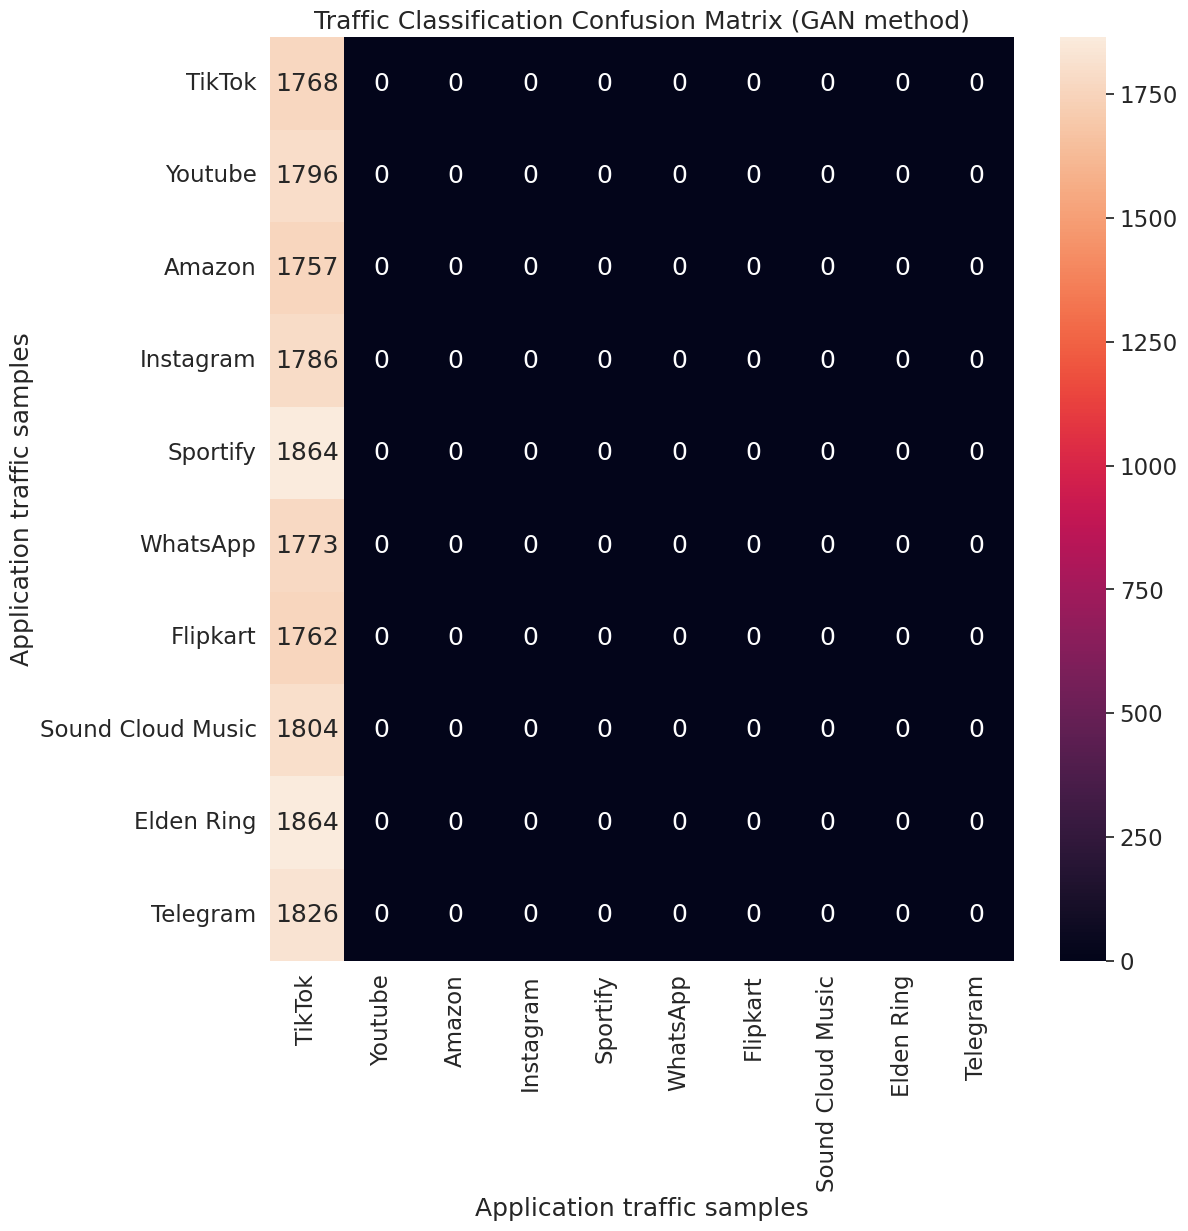

Models saved successfully.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Reshape, Input
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
labelnum = 4000  # Set the quantity of labeled data
LABELS = [
    'TikTok', 'Youtube', 'Amazon', 'Instagram',
    'Sportify', 'WhatsApp', 'Flipkart',
    'Sound Cloud Music', 'Elden Ring', 'Telegram'
]

# Step 1: Load Preprocessed Dataset (normalized and feature-engineered)
dfDS = pd.read_csv('pcapdroid_10class_each_normalized_cuttedfloefeature.csv')
X_full = dfDS.iloc[:, 1:len(dfDS.columns)].values
Y_full = dfDS["label"].values
n_classes = len(set(Y_full))
print("n_classes", n_classes)

# Step 2: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X_full, Y_full, test_size=0.1)
inp_size = x_train.shape[1]  # Feature size
print("x_train", x_train.shape)
print("y_train", y_train.shape)

# Step 3: Get Labeled Data Indices
def getlabelindex(Y_full, n_classes, labelnum):
    Y_full = pd.DataFrame(Y_full)
    Y_full.columns = ['label']
    idxs_annot = []
    for idx in range(n_classes):
        labelindex = Y_full.loc[Y_full['label'] == idx].index
        if len(labelindex) < labelnum:
            print(f"Label {idx} has fewer than {labelnum} samples, selecting all available samples.")
            idxs = np.random.choice(labelindex.values, labelnum, replace=False)
        else:
            idxs = np.random.choice(labelindex.values, labelnum, replace=False)
        idxs_annot.extend(idxs)
    return idxs_annot

# Select the labeled data
idxs_annot = getlabelindex(y_train, n_classes, labelnum)
print("Selected labeled data indices:", len(idxs_annot))

# One-hot encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

# Step 4: Prepare Labeled and Unlabeled Data
x_train_labeled = x_train[idxs_annot]
y_train_labeled = y_train[idxs_annot]
x_train_unlabeled = x_train
print("x_train_labeled shape:", x_train_labeled.shape)
print("y_train_labeled shape:", y_train_labeled.shape)

# Reshaping data for CNN input
x_train_labeled = np.expand_dims(x_train_labeled, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Step 5: Build GAN Components (Generator and Discriminator)

# Latent space dimension
latent_dim = 100

# Generator Model
generator = Sequential()
generator.add(Dense(128, activation='relu', input_dim=latent_dim))
generator.add(Dense(256, activation='relu'))
generator.add(Dense(512, activation='relu'))
generator.add(Dense(1024, activation='relu'))
generator.add(Dense(66, activation='tanh'))  # Output layer

# Discriminator Model
discriminator = Sequential()
discriminator.add(Dense(512, input_dim=66, activation='relu'))  # Change this to match the input shape
discriminator.add(Dense(256, activation='relu'))
discriminator.add(Dense(128, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))  # Output for real vs fake classification

# Compile Discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# GAN (Combined Model)
gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
x = Reshape((66, 1))(x)  # Reshaping to match the discriminator's expected input shape
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

# Step 6: Train GAN
# For GAN training, we typically alternate between training the discriminator and generator.
# We will train the discriminator with real and fake data, then train the generator through the combined model (GAN).

# Train the GAN
epochs = 10
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, x_train_labeled.shape[0], half_batch)
    real_images = x_train_labeled[idx]
    real_labels = np.ones((half_batch, 1))  # Label for real images

    # Generate fake images
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 1))  # Label for fake images

    # Train the discriminator on real and fake images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator via the GAN model (we want the discriminator to be fooled)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))  # Labels for the generator to fool the discriminator
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress
    print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

# Step 7: Evaluate on Test Data
y_pred = discriminator.predict(x_test, batch_size=100)

# Step 8: Classification Report
report = classification_report(y_test.argmax(-1), y_pred.argmax(-1), target_names=LABELS, digits=4)
print(report)

# Step 9: Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test.argmax(-1), y_pred.argmax(-1))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Traffic Classification Confusion Matrix (GAN method)")
plt.ylabel('Application traffic samples')
plt.xlabel('Application traffic samples')
plt.show()

# Step 10: Save the Models
generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')
gan.save('gan_model.keras')

print("Models saved successfully.")


In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import random

# Number of clients for federated learning
num_clients = 10
epochs = 1
batch_size = 128
labelnum = 4000  # Number of labeled data per client
latent_dim = 100  # Latent space dimension for the generator

# Load dataset
df = pd.read_csv('pcapdroid_10class_each_normalized_cuttedfloefeature.csv')
X_full = df.iloc[:, 1:].values
Y_full = df['label'].values
num_classes = len(set(Y_full))

# One-hot encode labels
Y_full = tf.keras.utils.to_categorical(Y_full, num_classes)

# Split dataset into training data for the server and clients
x_server, x_clients, y_server, y_clients = train_test_split(X_full, Y_full, test_size=0.9, random_state=42)

# Split data further into smaller chunks for each client
client_data_size = len(x_clients) // num_clients
x_clients_list = [x_clients[i * client_data_size:(i + 1) * client_data_size] for i in range(num_clients)]
y_clients_list = [y_clients[i * client_data_size:(i + 1) * client_data_size] for i in range(num_clients)]

# Define the Generator model
def build_generator(latent_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_dim=latent_dim),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='tanh')
    ])
    return model

# Define the Discriminator model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize the global GAN models
generator = build_generator(latent_dim, X_full.shape[1])
discriminator = build_discriminator(X_full.shape[1])

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy', metrics=['accuracy'])

# Function to aggregate weights
def aggregate_weights(client_weights):
    aggregated_weights = []
    for layer_idx in range(len(client_weights[0])):
        layer_weights = [client[layer_idx] for client in client_weights]
        aggregated_weights.append(np.mean(layer_weights, axis=0))
    return aggregated_weights

# Function to train GANs on clients and aggregate updates
def train_on_clients_and_aggregate():
    client_generators = [tf.keras.models.clone_model(generator) for _ in range(num_clients)]
    client_discriminators = [tf.keras.models.clone_model(discriminator) for _ in range(num_clients)]

    # Train each client's GAN locally
    for client_id in range(num_clients):
        x_client = x_clients_list[client_id]
        y_client = y_clients_list[client_id]
        client_generator = client_generators[client_id]
        client_discriminator = client_discriminators[client_id]

        # Compile client models
        client_discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                                     loss='binary_crossentropy', metrics=['accuracy'])

        # Train locally on client's data
        for epoch in range(epochs):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = client_generator.predict(noise)

            real_data = x_client[:batch_size]
            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            # Train the discriminator
            client_discriminator.train_on_batch(real_data, labels_real)
            client_discriminator.train_on_batch(generated_data, labels_fake)

            # Train the generator via the GAN
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            client_gan_input = tf.keras.Input(shape=(latent_dim,))
            client_gan_output = client_discriminator(client_generator(client_gan_input))
            client_gan = tf.keras.Model(client_gan_input, client_gan_output)
            client_gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')
            client_gan.train_on_batch(noise, labels_real)

    # Aggregate model weights
    generator_weights = aggregate_weights([model.get_weights() for model in client_generators])
    discriminator_weights = aggregate_weights([model.get_weights() for model in client_discriminators])

    # Update global models
    generator.set_weights(generator_weights)
    discriminator.set_weights(discriminator_weights)

# Federated learning loop
for iteration in range(10):  # Global federated training epochs
    print(f"Global iteration {iteration + 1} of federated learning")
    train_on_clients_and_aggregate()  # Clients train and aggregate

    # Evaluate global discriminator on server data
    labels_real = np.ones((len(x_server), 1))
    loss, acc = discriminator.evaluate(x_server, labels_real, verbose=0)
    print(f"Global Discriminator Accuracy after iteration {iteration + 1}: {acc:.4f}")

# Save the global generator model
generator.save('global_gan_generator.keras')
print("Global Generator model saved successfully!")


Global iteration 1 of federated learning
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
Global Discriminator Accuracy after iteration 1: 1.0000
Global iteration 2 of federated learning
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Global Discriminator Accuracy after iteration 2: 1.0000
Global iteration 3 of federated learning
4/4

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Number of fog servers (clients) for federated learning
num_fog_servers = 10
epochs = 1
batch_size = 128
latent_dim = 100  # Latent space dimension for the generator

# Load dataset
df = pd.read_csv('pcapdroid_10class_each_normalized_cuttedfloefeature.csv')
X_full = df.iloc[:, 1:].values
Y_full = df['label'].values
num_classes = len(set(Y_full))

# One-hot encode labels
Y_full = tf.keras.utils.to_categorical(Y_full, num_classes)

# Split dataset into training data for the server and fog nodes
x_global, x_fog, y_global, y_fog = train_test_split(X_full, Y_full, test_size=0.9, random_state=42)

# Split data further into smaller chunks for each fog server
fog_data_size = len(x_fog) // num_fog_servers
x_fog_list = [x_fog[i*fog_data_size:(i+1)*fog_data_size] for i in range(num_fog_servers)]
y_fog_list = [y_fog[i*fog_data_size:(i+1)*fog_data_size] for i in range(num_fog_servers)]

# Define the Generator model
def build_generator(latent_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_dim=latent_dim),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='tanh')
    ])
    return model

# Define the Discriminator model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize the global Generator model
global_generator = build_generator(latent_dim, X_full.shape[1])

# Initialize discriminators at fog servers
fog_discriminators = [build_discriminator(X_full.shape[1]) for _ in range(num_fog_servers)]

# Compile discriminators
for discriminator in fog_discriminators:
    discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                          loss='binary_crossentropy', metrics=['accuracy'])

# Federated training function
def train_discriminators_and_aggregate():
    global_generator_weights = global_generator.get_weights()

    # Train discriminators at fog nodes
    discriminator_weights = []
    for server_id in range(num_fog_servers):
        fog_discriminator = fog_discriminators[server_id]
        x_fog_data = x_fog_list[server_id]

        for epoch in range(epochs):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = global_generator.predict(noise)

            real_data = x_fog_data[:batch_size]
            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            # Train the discriminator on real and fake data
            fog_discriminator.train_on_batch(real_data, labels_real)
            fog_discriminator.train_on_batch(generated_data, labels_fake)

        discriminator_weights.append(fog_discriminator.get_weights())

    # Aggregate discriminator weights
    avg_discriminator_weights = [
        np.mean([weights[layer] for weights in discriminator_weights], axis=0)
        for layer in range(len(discriminator_weights[0]))
    ]

    # Update global generator's discriminator
    for fog_discriminator in fog_discriminators:
        fog_discriminator.set_weights(avg_discriminator_weights)

# Global federated learning loop
for iteration in range(10):
    print(f"Global iteration {iteration + 1} of federated learning")

    # Train discriminators and aggregate
    train_discriminators_and_aggregate()

    # Train global generator
    noise = np.random.normal(0, 1, (len(x_global), latent_dim))
    labels_real = np.ones((len(x_global), 1))

    global_generator.train_on_batch(noise, labels_real)

    # Evaluate global generator's discriminator on server data
    loss, acc = fog_discriminators[0].evaluate(x_global, labels_real, verbose=0)
    print(f"Global Discriminator Accuracy after iteration {iteration + 1}: {acc:.4f}")

# Save the global generator model
global_generator.save('global_generator_fog_discriminatorsFGAN2.keras')
print("Global Generator model saved successfully!")


Global iteration 1 of federated learning
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


ValueError: You must call `compile()` before using the model.